In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Function to find closest centroids to the given points
def closest_centroids(X,centroids):
  K = centroids.shape[0]
  m = X.shape[0]
  idx = np.zeros(m,dtype=int)
  for i in range(m):
    dist=[]
    for j in range(K):
      norm = np.linalg.norm(X[i]-centroids[j])
      dist.append(norm)
    idx[i] = np.argmin(dist)
  return idx

In [3]:
def new_centroids(X,idx,K):
  m,n=X.shape
  centroid = np.zeros((K,n))
  for k in range(K):
    points = X[idx==k]
    centroid[k] = np.mean(points,axis=0)
  return centroid


In [4]:
def run_kMeans(X, initial_centroids, max_iters, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        idx = closest_centroids(X, centroids)
        centroids = new_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [5]:
def initial(X,k):
  rand = np.random.permutation(X.shape[0])
  centroid = X[rand[:k]]
  return centroid
  

In [33]:
org_img = plt.imread('goku.png')

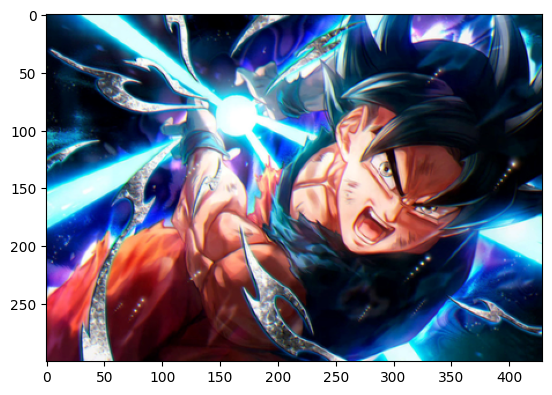

In [34]:
plt.imshow(org_img)

In [35]:
org_img.shape

(300, 429, 4)

In [37]:
length = 300*429

In [39]:
X_img = np.reshape(org_img,(length,4))

In [40]:
K = 8
max_iters = 10
init = initial(X_img,K)
centroids, idx = run_kMeans(X_img,init,max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [41]:
idx = closest_centroids(X_img,centroids)
X_rec = centroids[idx,:]
X_rec = np.reshape(X_rec,org_img.shape)

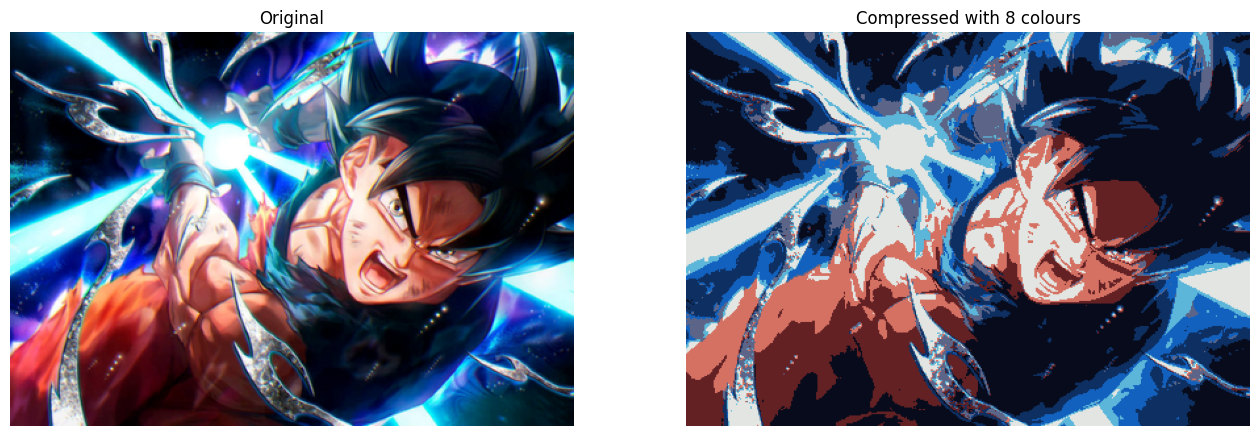

In [42]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(org_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_rec)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()